Perfect — this is a classic classification problem with an emphasis on interpretability. Since stakeholders want to understand how each feature affects the probability of winning, we’ll use logistic regression (transparent coefficients) and add model interpretability tools like Partial Dependence Plots (PDP) or SHAP values.

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import shap

shap.utils._legacy.disable_progress_bar = True

# -----------------------------
# 1. Example dataset
# -----------------------------

In [5]:
data = {
    "games_won": [50, 30, 40, 20, 60, 10, 45, 25],
    "games_lost": [20, 40, 30, 50, 15, 60, 25, 45],
    "injuries": [2, 5, 3, 6, 1, 7, 2, 4],
    "experience_years": [80, 60, 70, 50, 100, 40, 85, 55],
    "win_next_game": [1, 0, 1, 0, 1, 0, 1, 0]  # target variable
}

df = pd.DataFrame(data)

X = df[["games_won", "games_lost", "injuries", "experience_years"]]
y = df["win_next_game"]

# -----------------------------
# 2. Train/Test Split
# -----------------------------

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# -----------------------------
# 3. Logistic Regression Model
# -----------------------------

In [7]:
model = LogisticRegression()
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


# -----------------------------
# 4. Evaluation
# -----------------------------

In [8]:
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



# -----------------------------
# 5. Feature Importance (Coefficients)
# -----------------------------

In [9]:
importance = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

print("\nFeature Importance:\n", importance)


Feature Importance:
             Feature  Coefficient
3  experience_years     0.195101
0         games_won     0.194038
2          injuries    -0.014239
1        games_lost    -0.194320


# -----------------------------
# 6. SHAP for Interpretability
# -----------------------------

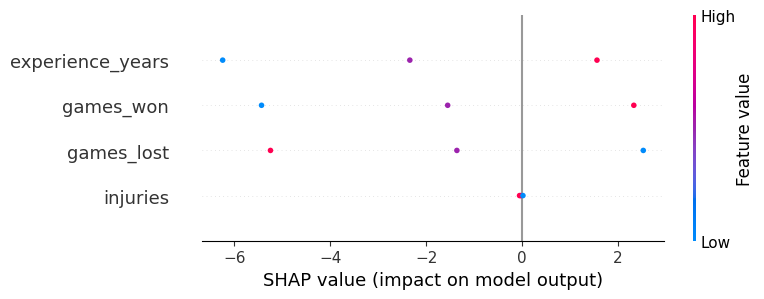

In [10]:
explainer = shap.LinearExplainer(model, X_train)
shap_values = explainer.shap_values(X_test)

# Summary plot (shows average impact of each feature)
shap.summary_plot(shap_values, X_test)

# -----------------------------
# 7. Partial Dependence Example
# -----------------------------

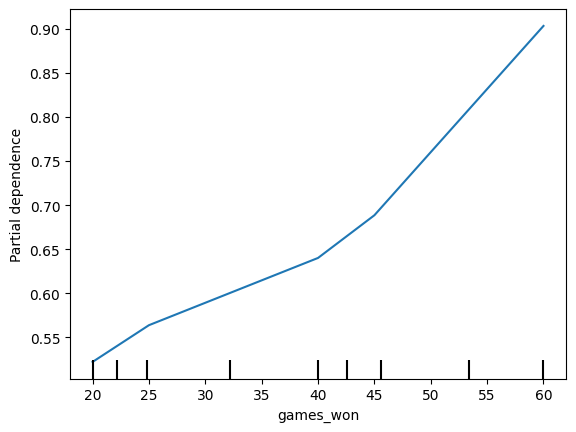

In [13]:
from sklearn.inspection import PartialDependenceDisplay

PartialDependenceDisplay.from_estimator(model, X_train, ["games_won"])
plt.show()

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

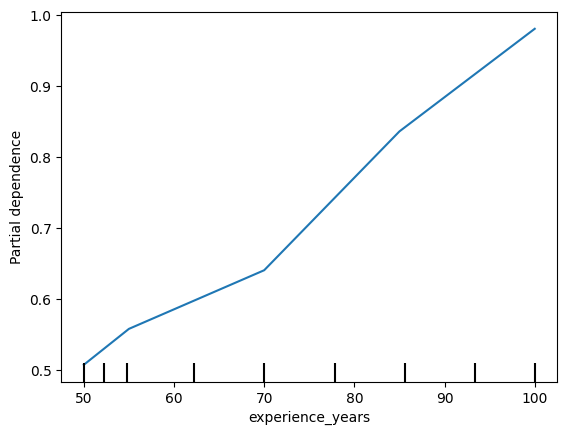

In [14]:
from sklearn.inspection import PartialDependenceDisplay

PartialDependenceDisplay.from_estimator(model, X_train, ["experience_years"])
plt.show()

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

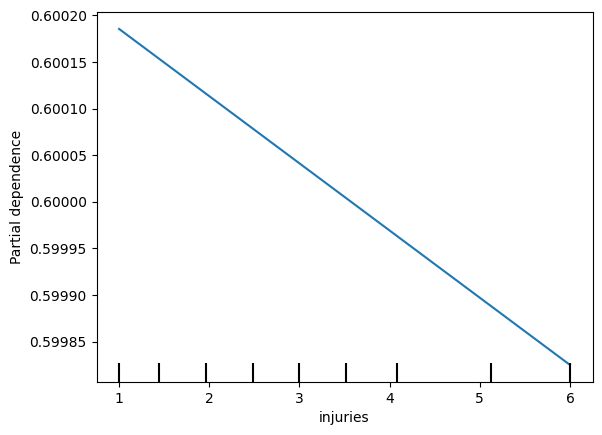

In [15]:
from sklearn.inspection import PartialDependenceDisplay

PartialDependenceDisplay.from_estimator(model, X_train, ["injuries"])
plt.show()

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)